# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
from matplotlib import image
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from PIL import Image
from tqdm import tqdm
import cv2 
import pytesseract

## Extracting tar files

In [ ]:
import tarfile

path_tgz = "/home/dungeon/Downloads/01.OCR/archive(1)/"
path_store= "/home/dungeon/Downloads/01.OCR/extracted file/"

def extract(tar_add, ext_add):
    filename = tar_add
    tf = tarfile.open(filename)
    tf.extractall(ext_add)

import os
for file in os.listdir(path_tgz):
    if file.endswith(".tgz"):
        tgz_loc = (os.path.join(path_tgz, file))
        ext_loc = (os.path.splitext((os.path.join(path_store, file)))[0])
        extract(tgz_loc, ext_loc)
        

In [ ]:
tf.close()

## Creating Dataset

In [ ]:
import os

path_tgz = "C:/Users/Prince.pal/codes/01.OCR/Pan Card Data/"
path_store= "/home/dungeon/Downloads/01.OCR/extracted file/"


dates_img_path = []
dates_txt_path = []
names_img_path = []
names_txt_path = []
numbers_img_path = []
numbers_txt_path = []

for file in os.listdir(path_store):
    for img in os.listdir(os.path.join(path_store, file+'/')):
        if 'date' in file:
            if img.endswith(".png"):
                dates_img_path.append((os.path.join(path_store, file+'/',img)))
            else:
                dates_txt_path.append((os.path.join(path_store, file+'/',img)))
        if 'name' in file:
            if img.endswith(".png"):
                names_img_path.append((os.path.join(path_store, file+'/',img)))
            else:
                names_txt_path.append((os.path.join(path_store, file+'/',img)))
        if 'number' in file:
            if img.endswith(".png"):
                numbers_img_path.append((os.path.join(path_store, file+'/',img)))
            else:
                numbers_txt_path.append((os.path.join(path_store, file+'/',img)))
        
        

## Creating Dataframe

In [ ]:
dates_img_path.sort()
dates_txt_path.sort()
names_img_path.sort()
names_txt_path.sort()
numbers_img_path.sort()
numbers_txt_path.sort()
print("length of dates_img_path = ",len(dates_img_path))
print("length of dates_txt_path = ",len(dates_txt_path))
print("length of names_img_path = ",len(names_img_path))
print("length of names_txt_path = ",len(names_txt_path))
print("length of numbers_img_path = ",len(numbers_img_path))
print("length of numbers_txt_path = ",len(numbers_txt_path))

### Extracting Text

In [ ]:
!pip3 install tqdm

In [ ]:
from tqdm import tqdm
import pandas as pd
dates = []
names = []
numbers = []

def ext_txt(name,path):
    for file in tqdm(path):
        with open(file, 'rt') as fd:
            first_line = fd.readline()
            name.append(first_line)




In [ ]:
ext_txt(dates,dates_txt_path)
ext_txt(numbers, numbers_txt_path)
ext_txt(names, names_txt_path)

In [ ]:
dates = pd.Series(dates)
names = pd.Series(names)
numbers = pd.Series(numbers)

In [ ]:
import pandas as pd
#dt_nm_nu = pd.DataFrame({"date":dates, "name":names, "numbers":numbers})

#dt_nm_nu = pd.DataFrame(list(zip(dates, names,numbers)), columns = ['dates', 'names','numbers']
dt= pd.DataFrame({"dates": dates})
nm= pd.DataFrame({"names": names})
nu= pd.DataFrame({"numbers": numbers})


In [ ]:
dt.to_csv("original_dates_text.csv")
dt.tail()

In [ ]:
nm.to_csv("original_names_text.csv")
nm.tail()

In [ ]:
nu.to_csv("original_number_text.csv")
nu.tail()

In [ ]:
dt_nm_nu['names']= names
dt_nm_nu['numbers']= numbers
dt_nm_nu['names']

In [ ]:
from PIL import Image

image = Image.open(dates_img_path[0])
print(image.format)
print(image.size)
print(image.mode)
# show the image
image.show()

In [ ]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread(dates_img_path[0])
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [ ]:
text = dates + names + numbers
img_path = dates_img_path + names_img_path + numbers_img_path

In [ ]:
df1 = pd.DataFrame({'Text':text, 'Image_Path':img_path})
df1

In [ ]:
df1.to_csv("Text_and_img_Path.csv")

## Comparision

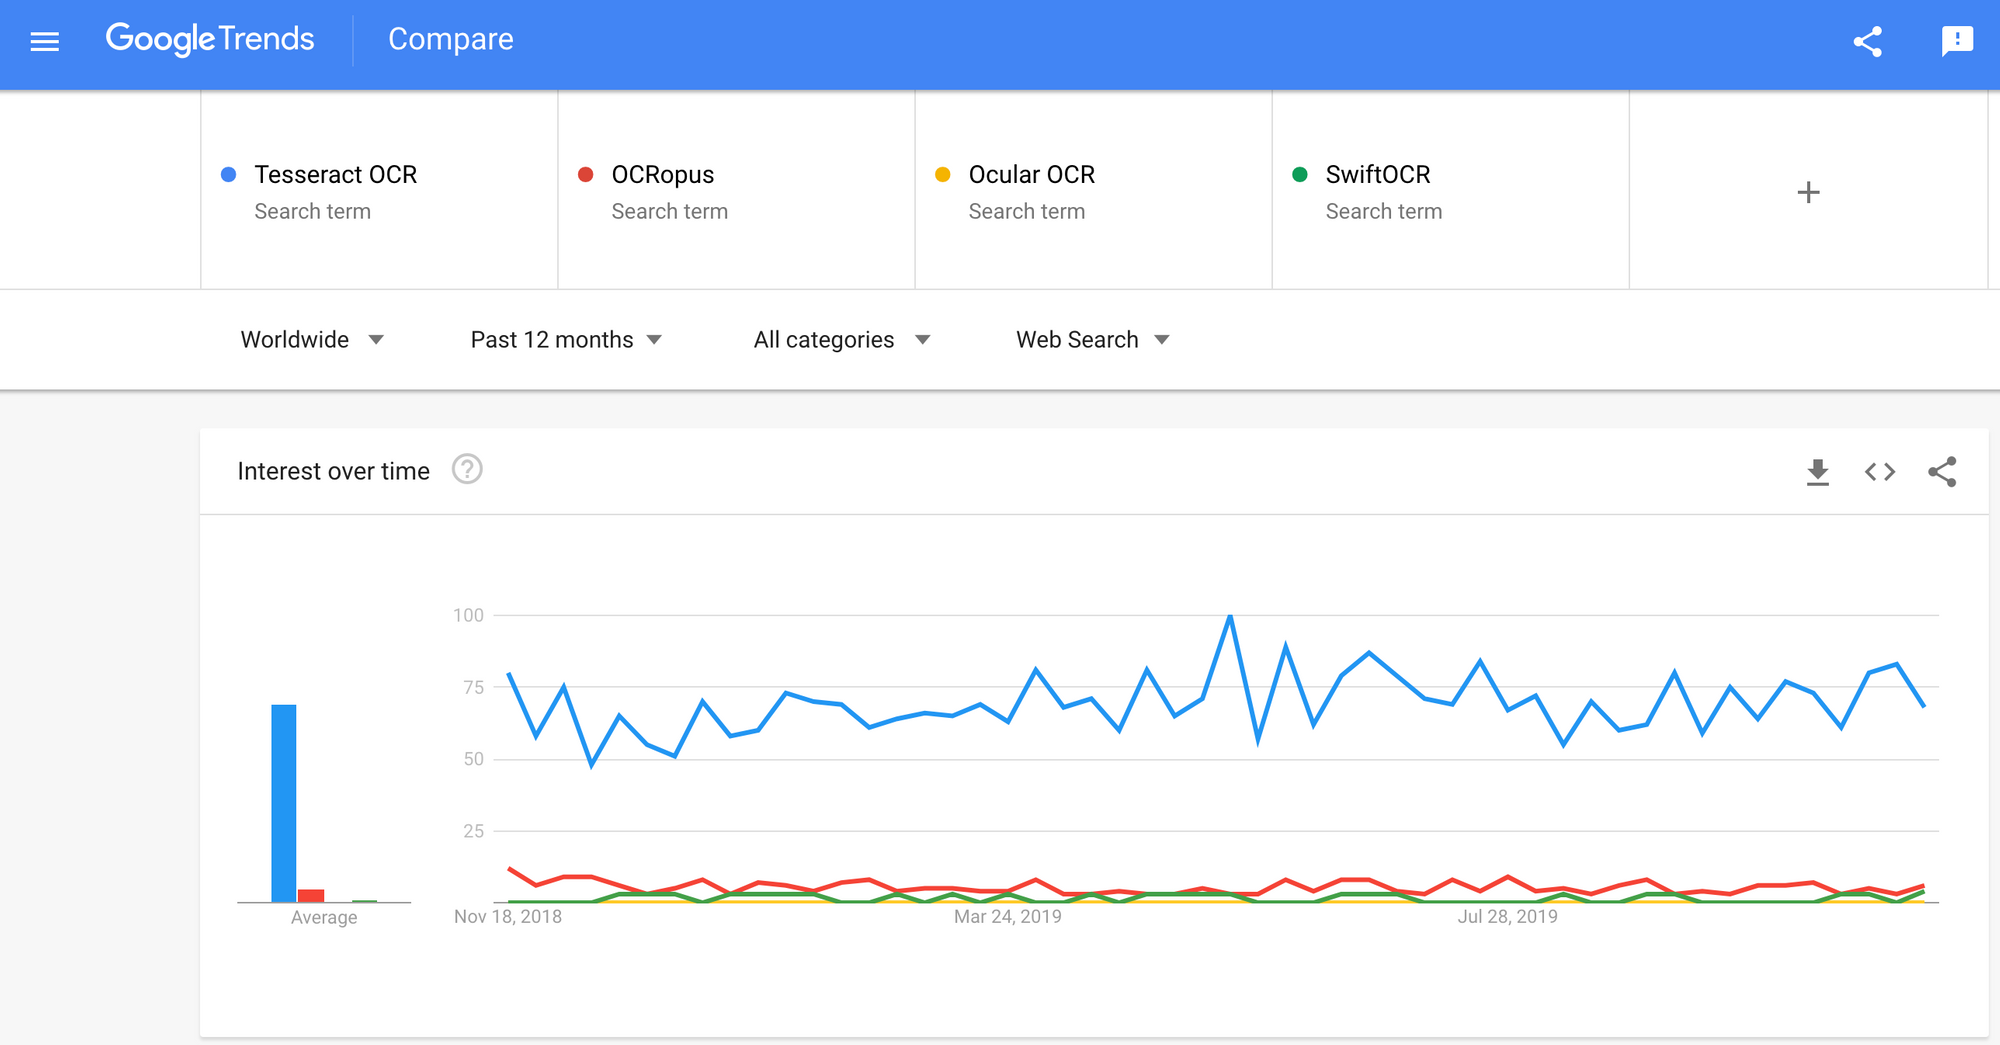

In [ ]:
!pip3 install pytesseract

In [ ]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread(names_img_path[1])
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()


In [ ]:
import cv2 
import pytesseract

img = cv2.imread(names_img_path[1])

# Adding custom options
custom_config = r'--oem 3 --psm 6 '
text = pytesseract.image_to_string(img)#, config=custom_config)
text[:-2]

# main text_extraction

In [ ]:
import cv2 
import pytesseract
from tqdm import tqdm


dates_txt_01 = [] # storing all the extracted dates 
names_txt_01 = [] # storing all the extracted names 
numbers_txt_01 = [] # storing all the extracted numbers 


def img_to_txt(pictures,new_list):
    for img in tqdm(pictures):
        image = cv2.imread(img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        custom_config = r'--oem 3 --psm 6 '
        text = pytesseract.image_to_string(image)#, config=custom_config)
        new_list.append(text[:-2])


In [ ]:
img_to_txt(names_img_path, names_txt_01)
df = pd.DataFrame({'names_Extracted_Text': names_txt_01})
df.to_csv("names_txt_01")
df.tail()

In [ ]:
img_to_txt(numbers_img_path, numbers_txt_01)
df1 = pd.DataFrame({'numbers_Extracted_Text': numbers_txt_01})
df1.to_csv("numbers_txt_01")
df1.tail()

In [ ]:
img_to_txt(dates_img_path, dates_txt_01)
df2 = pd.DataFrame({'dates_Extracted_Text': dates_txt_01})
df2.to_csv("dates_txt_01.csv")
df2.tail()

# Creating Datasets for DATES, NAMES, NUMBERS

In [ ]:
# merging oringinal dates with extracted dates in a dataframe

# temp df to load dates 
temp_df = pd.read_csv("/content/original_dates_text.csv").drop(['Unnamed: 0'],axis=1)
date_df = pd.concat([temp_df, df2], axis=1, join='inner')
date_df.to_csv("date_df.csv")
date_df.tail()

In [ ]:
# merging oringinal names with extracted names in a dataframe

# temp df to load names 
temp_df = pd.read_csv("/home/dungeon/Downloads/archive/original_names_text.csv").drop(['Unnamed: 0'],axis=1)

name_df = pd.concat([temp_df, df], axis=1, join='inner')
name_df.to_csv("name_df.csv")
name_df.tail()

In [ ]:
# merging oringinal numbers with extracted numbers in a dataframe

# temp df to load numbers
temp_df = pd.read_csv("/content/original_number_text.csv").drop(['Unnamed: 0'],axis=1)
df1 = pd.read_csv("/content/numbers_txt_01.csv").drop(['Unnamed: 0'],axis=1)
numbers_df = pd.concat([temp_df, df1], axis=1, join='inner')
numbers_df.to_csv("numbers_df.csv")
numbers_df.tail()

In [ ]:
date_df = pd.read_csv("/home/dungeon/Downloads/archive/date_df.csv").drop(['Unnamed: 0'],axis=1)
numbers_df = pd.read_csv("/home/dungeon/Downloads/archive/numbers_df.csv").drop(['Unnamed: 0'],axis=1)

# Checking Accuracy

In [ ]:
date_df['dates'].shape
date_df['dates_Extracted_Text'].shape

In [ ]:
#Accuracy on Dates
acc = 0
for ind in date_df.index:
    if str(date_df['dates'][ind])==str(date_df['dates_Extracted_Text'][ind]):
        #print(date_df['dates_Extracted_Text'][ind])
        acc+=1
print("accuracy :",(acc/len(date_df['dates'])) * 100)

In [ ]:
# Accuracy on names
acc = 0
for ind in name_df.index:
    if str(name_df['names'][ind])==str(name_df['names_Extracted_Text'][ind]):
        #print(date_df['dates_Extracted_Text'][ind])
        acc+=1
print("accuracy :",(acc/len(name_df['names'])) * 100)

In [ ]:
# Accuracy on Numbers
acc = 0
for ind in numbers_df.index:
    if str(numbers_df['numbers'][ind])==str(numbers_df['numbers_Extracted_Text'][ind]):
        #print(date_df['dates_Extracted_Text'][ind])
        acc+=1
print("accuracy :",(acc/len(numbers_df['numbers'])) * 100)

# Preprocessing on the images

In [ ]:


img = cv2.imread(numbers_img_path[0])

kernel = np.array([[-1,-1,-1],[-1, 7,-1],[0,-1,0]])

#img = cv2.filter2D(img, -1, kernel)

pyplot.imshow(img,'gray')
pyplot.show()
import re
text = pytesseract.image_to_string(img)#, config=custom_config)
#text = re.findall('([A-Z]{5}([0-9]+)([A-Z]?))', text)
text = re.findall('\w*',text)
text = "".join(text)
text = re.search('[A-Z]+(\d){4}[A-Z]?',text)
print(text[0])
#text = re.sub(['\!','\@','\#','\$','\%','\^','\&','\*','\)','\('],"",text[0])
#print("".join(text))

In [ ]:
import re
text = pytesseract.image_to_string(img)#, config=custom_config)
#text = re.findall('(\d{2})[/.-](\d{2})[/.-](\d{4})$', text)
text = re.search('([1-3]?[0-9])[/](\d{2})[/](\d{4})',text)
print(text[0])

In [ ]:
# Calculate skew angle of an image
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=5)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    minAreaRect = cv2.minAreaRect(largestContour)

    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

In [ ]:
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [ ]:
img = cv2.imread(dates_img_path[8])

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img = cv2.filter2D(img, -1, kernel)

#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#img = deskew(img)

pyplot.imshow(img,'gray')
pyplot.show()

# checking accuracy after preprocessing

In [ ]:
def sharpening(image):
    kernel = np.array([[-1,-1,0],[-1, 7,-1],[0,-1,0]])
    img = cv2.filter2D(image, -1, kernel)
    return img
    
def img_to_txt(pictures,new_list):
    for img in tqdm(pictures):
        image = cv2.imread(img)
        image = sharpening(image)
        custom_config = r'--oem 3 --psm 6 '
        text = pytesseract.image_to_string(image)#, config=custom_config)
        new_list.append(text[:-2])
        #text = re.search('([1-3]?[0-9])[/](\d{2})[/](\d{4})',text)
        #if text == None:
            #new_list.append(np.nan)
        #else:
            #new_list.append(text[:-2])
            
def date_format(f):
    try:
        return pd.to_datetime(f)
    except Exception as e:
        return e.args


In [ ]:
dates_txt_02=[]
img_to_txt(dates_img_path, dates_txt_02)
date_df['dates_Extracted_Text_02'] = dates_txt_02
acc = 0
date_df['dates'].apply(date_format)
date_df['dates_Extracted_Text_02'].apply(date_format)
for ind in date_df.index:
    if str(date_df['dates'][ind])==str(date_df['dates_Extracted_Text_02'][ind]):
        #print(date_df['dates_Extracted_Text'][ind])
        acc+=1

print("accuracy :",(acc/len(date_df['dates'])) * 100)


In [ ]:
def date_format(f):
    try:
        return pd.to_datetime(f)
    except Exception as e:
        return e.args

date_df['dates'] = date_df['dates'].apply(date_format)
date_df['dates_Extracted_Text_02'] = date_df['dates_Extracted_Text_02'].apply(date_format)
#date_df['dates']= pd.to_datetime(date_df['dates'],format='%d/%m/%y')

In [ ]:
acc = 0
for ind in date_df.index:
    if (date_df['dates'][ind])==(date_df['dates_Extracted_Text_02'][ind]):
        #print(date_df['dates_Extracted_Text'][ind])
        acc+=1

print("accuracy :",(acc/len(date_df['dates'])) * 100)


In [ ]:
date_df.to_csv("date_df.csv")


In [ ]:
names_txt_02=[]
img_to_txt(names_img_path, names_txt_02)
name_df['names_Extracted_Text_02'] = names_txt_02

acc = 0

for ind in name_df.index:
    if str(name_df['names'][ind])==str(name_df['names_Extracted_Text_02'][ind]):
        #print(date_df['dates_Extracted_Text'][ind])
        acc+=1

print("accuracy :",(acc/len(name_df['names'])) * 100)

In [ ]:
name_df.to_csv("name_df.csv")

In [ ]:
numbers_txt_02=[]
img_to_txt(numbers_img_path, numbers_txt_02)
numbers_df['numbers_Extracted_Text_02'] = numbers_txt_02

acc = 0

for ind in numbers_df.index:
    if str(numbers_df['numbers'][ind])==str(numbers_df['numbers_Extracted_Text_02'][ind]):
        #print(date_df['dates_Extracted_Text'][ind])
        acc+=1
print("accuracy :",(acc/len(numbers_df['numbers'])) * 100)

In [ ]:
#numbers_df.to_csv("numbers_df.csv")
numbers_df.head(7)

In [ ]:
new = []
for i in numbers_df.index:
    #n = re.search('([A-Z]{5}(\d{4})([A-Z]?))',)
    n = re.findall('\w*',numbers_df['numbers_Extracted_Text_02'][i])
    n = "".join(n)
    n = re.search('[A-Z]+(\d){4}[A-Z]?',n)
    #n = re.findall('\w*',numbers_df['numbers_Extracted_Text_02'][i])
    if n == None:
        new.append(np.nan)
    else:
        new.append(n[0])

numbers_df["new"] = new


In [ ]:
acc = 0

for ind in numbers_df.index:
    if str(numbers_df['numbers'][ind])==str(numbers_df['new'][ind]):
        #print(date_df['dates_Extracted_Text'][ind])
        acc+=1
    """else:
        print(ind,str(numbers_df['numbers'][ind]),str(numbers_df['new'][ind]))"""
print("accuracy :",(acc/len(numbers_df['numbers'])) * 100)

In [ ]:
numbers_df.to_csv("numbers_df.csv")

## EDA
-Preprocessing of the Image

-Text Localization

-Character Segmentation

-Character Recognition

-Post Processing

# Random

In [ ]:
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML


In [ ]:
pd.set_option('display.max_colwidth', -1)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

In [ ]:
"""dogs = pd.read_csv('../input/labels.csv')
dogs = dogs.sample(20)
dogs['file'] = dogs.id.map(lambda id: f'../input/train/{id}.jpg')
dogs['image'] = dogs.file.map(lambda f: get_thumbnail(f))
dogs.head()"""

df = pd.DataFrame(list(zip(dates,dates_img_path)), columns=['dates','dates_image_path'])
df.head()

In [ ]:
# displaying PIL.Image objects embedded in dataframe
HTML(dogs[['breed', 'image']].to_html(formatters={'image': image_formatter}, escape=False))

In [ ]:
# display images specified by path
HTML(dogs[['breed', 'file']].to_html(formatters={'file': image_formatter}, escape=False))